In [164]:
# Appendix A
import tensorflow as tf
import keras

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import MeanSquaredError

In [167]:
# Load the data
data = pd.read_csv('Housing_Data.csv')

In [168]:
# Data Cleaning
data = data[pd.to_numeric(data['floorArea'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['pricePerSqFt'], errors='coerce').notnull()]
data = data.dropna()

# Convert columns to appropriate types
data['floorArea'] = pd.to_numeric(data['floorArea'], errors='coerce').astype('float32')
data['pricePerSqFt'] = pd.to_numeric(data['pricePerSqFt'], errors='coerce').astype('float32')

In [169]:
# Prepare the data
X = data[['floorArea', 'bedrooms']].values
data['totalPrice'] = data['floorArea'] * data['pricePerSqFt']
y = data['totalPrice'].values

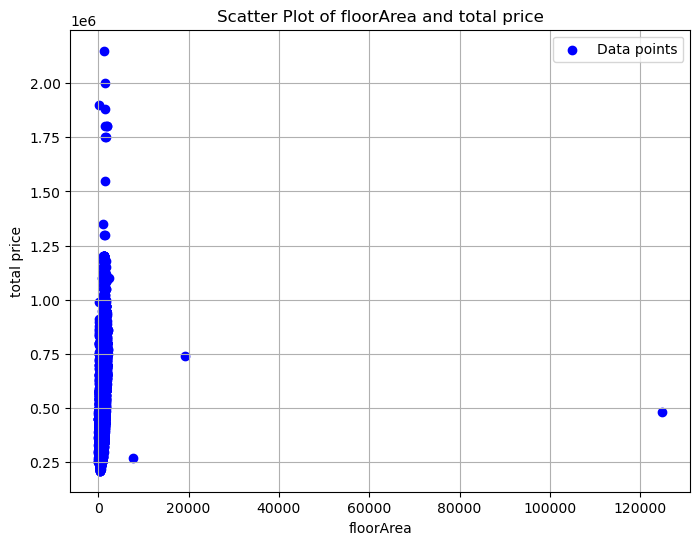

In [170]:
# Quick look at floorArea and price data

plt.figure(figsize=(8, 6))
plt.scatter(data['floorArea'], data['totalPrice'], color='blue', label='Data points')
plt.title('Scatter Plot of floorArea and total price')
plt.xlabel('floorArea')
plt.ylabel('total price')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
# Remove extreme outlier data point
# data = data[data['floorArea'] <= 7500]

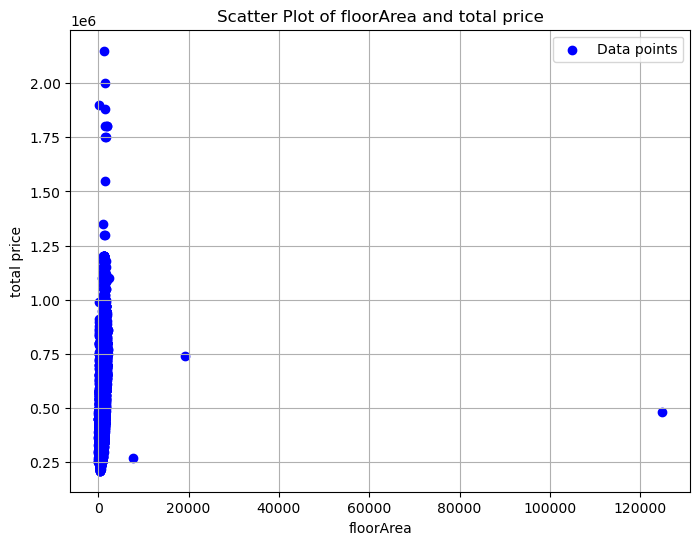

In [172]:
# Quick look at floorArea and price data

plt.figure(figsize=(8, 6))
plt.scatter(data['floorArea'], data['totalPrice'], color='blue', label='Data points')
plt.title('Scatter Plot of floorArea and total price')
plt.xlabel('floorArea')
plt.ylabel('total price')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [174]:
# Specify the model
model = Sequential()
model.add(Dense(2, activation='relu',input_shape=(2,)))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='relu'))  # Output layer 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [175]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reshape y before scaling
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Convert to TensorFlow Tensors
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Scale x and y using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


In [176]:
# Implement mini-batch gradient descent
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

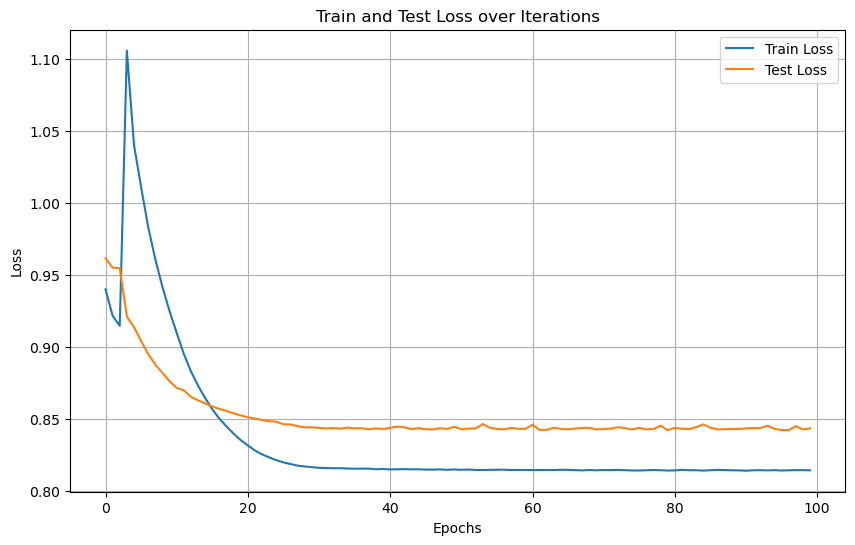

In [177]:
# Step 5: Plot the train and test errors versus iteration step
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(np.arange(epochs), train_loss, label='Train Loss')
plt.plot(np.arange(epochs), val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
# Predict using the trained model
y_pred = model.predict(X_test)

154/154 [==============================] - 0s 174us/step


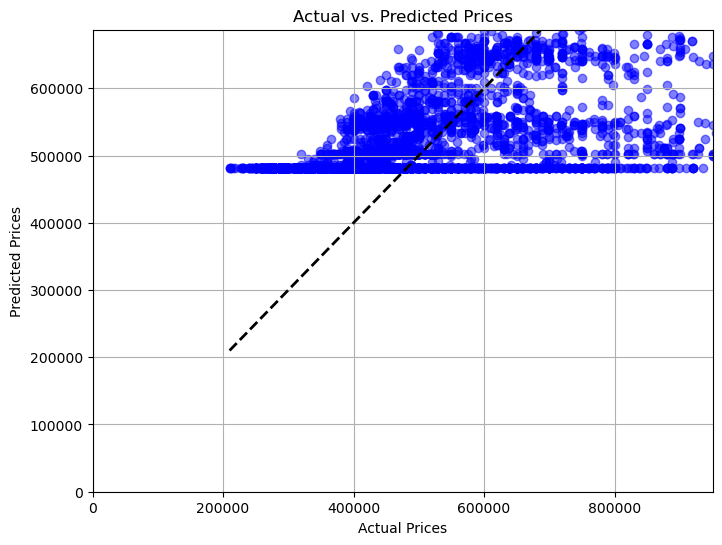

In [179]:
# Predict and unscale y
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_test_unscaled = scaler_y.inverse_transform(y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='blue', alpha=0.5)
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=2)
plt.xlim([0, np.percentile(y_test_unscaled, 99)])  # Limit x-axis in case of outliers
plt.ylim([0, np.percentile(y_pred_unscaled, 99)])  # Limit y-axis in case of outliers
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

In [180]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 20450874557.48399
